In [1]:
import matplotlib.pyplot as plt 
import time
import random

from src.problem import MultiODProblem
from src.gurobi.gurobi_formulation import formulation
from src.gurobi.utils import display_gurobi_result, generate_paths_from_gurobi_result

In [4]:
# record time taken for solving the problem
# record the solution cost
def gurobi_sol(num_O, seed: int = 1):
    
    start_time = time.time()
    p = MultiODProblem(num_O, 1, seed=seed)
    X, m = formulation(p, '2D')
    m.optimize()
    end_time = time.time()
    
    fig = display_gurobi_result(X, m, p)
    plt.show()
    paths = generate_paths_from_gurobi_result(X)
    execution_time = end_time - start_time
    
    print("\n\nSolution Report \n")
    print(f"The path is: {paths}")
    print(f"The solution is feasible: {p.is_feasible(paths)}")
    print(f"The solution cost is: {m.objVal}")
    print(f"Execution time: {execution_time} seconds")

Restricted license - for non-production use only - expires 2024-10-28


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 351 rows, 342 columns and 1786 nonzeros
Model fingerprint: 0x49171d92
Variable types: 18 continuous, 324 integer (324 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [3e-02, 1e+00]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 4e+01]
Presolve removed 85 rows and 61 columns
Presolve time: 0.03s
Presolved: 266 rows, 281 columns, 1297 nonzeros
Variable types: 16 continuous, 265 integer (265 binary)
Found heuristic solution: objective 7.1792202

Root relaxation: objective 2.383690e+00, 86 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.38369    0   20    7.17922  

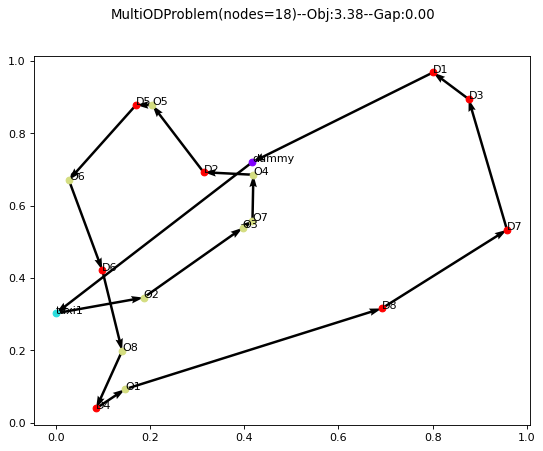



Solution Report 

The path is: [[0, 1, 3, 4, 8, 5, 11, 6, 14, 7, 15, 9, 13, 2, 17, 16, 12, 10, 0]]
The solution is feasible: True
The solution cost is: 3.3848073159963983
Execution time: 2.8694257736206055 seconds


In [5]:
gurobi_sol(8, 1)